Saving Iris.csv to Iris (5).csv
K=1 -> Accuracy: 0.97
K=2 -> Accuracy: 1.00
K=3 -> Accuracy: 1.00
K=4 -> Accuracy: 1.00
K=5 -> Accuracy: 1.00
K=6 -> Accuracy: 1.00
K=7 -> Accuracy: 1.00
K=8 -> Accuracy: 1.00
K=9 -> Accuracy: 1.00
K=10 -> Accuracy: 1.00


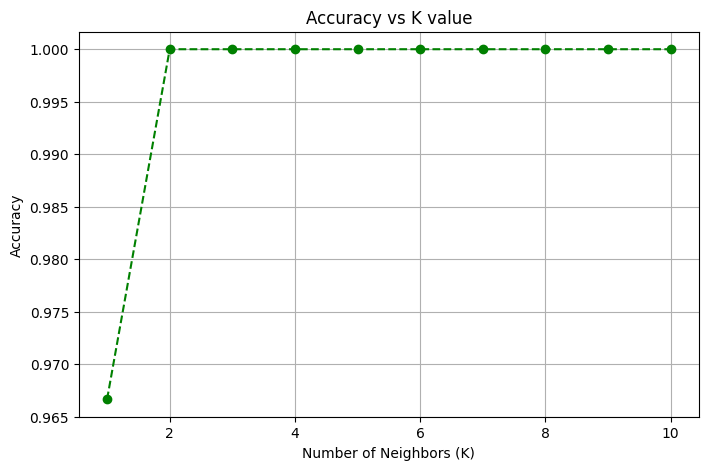

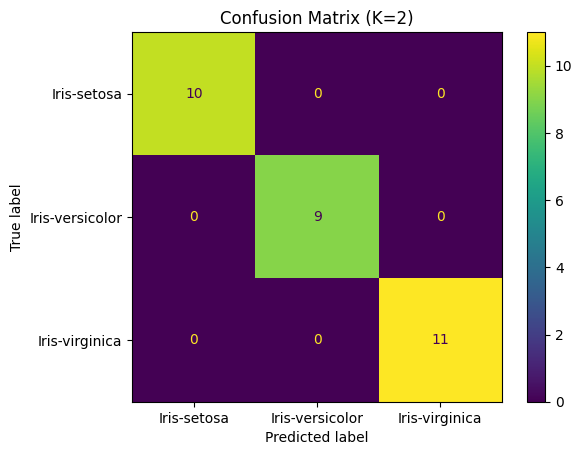

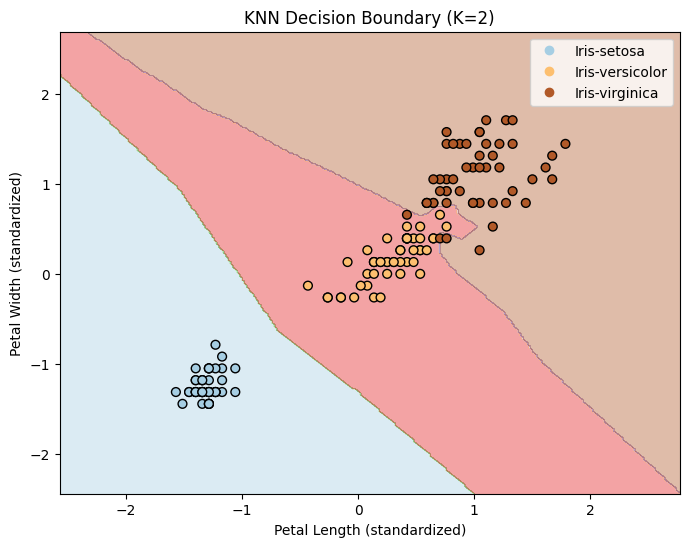

In [6]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load Dataset from CSV (Upload first if running on Colab)
from google.colab import files
uploaded = files.upload()

# Assume the uploaded file is named 'Iris.csv'
df = pd.read_csv("/content/Iris.csv")

# Step 3: Prepare Data
# Drop 'Id' column
df = df.drop(columns=['Id'])

# Encode species as numeric labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train KNN for Different K Values
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.2f}")

# Step 6: Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='--', color='green')
plt.title("Accuracy vs K value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Step 7: Confusion Matrix
best_k = np.argmax(accuracies) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

# Step 8: Decision Boundary with Two Features (PetalLengthCm, PetalWidthCm)
X_2d = df[['PetalLengthCm', 'PetalWidthCm']]
X_2d_scaled = StandardScaler().fit_transform(X_2d)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, y, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Meshgrid for decision boundary
h = .02
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
scatter = plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel("Petal Length (standardized)")
plt.ylabel("Petal Width (standardized)")
plt.title(f"KNN Decision Boundary (K={best_k})")

# Generate legend
handles, _ = scatter.legend_elements()
classes = list(le.classes_)
plt.legend(handles=handles[:len(classes)], labels=classes)
plt.show()
